In [2]:
import geopandas as gpd
import numpy as np 
import pandas

<Axes: >

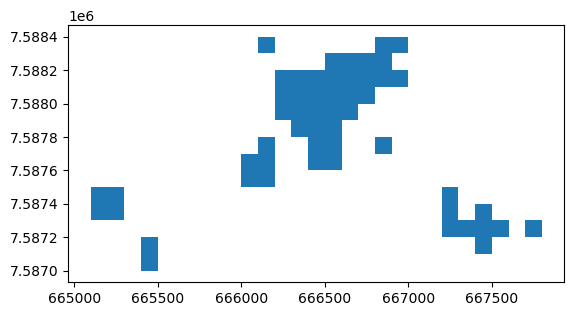

In [3]:
# import the 100x100 meter rutor data (all rutor all of Sweden)
df_pals_rutor = gpd.read_file("/Users/nadja/Documents/UU/Thesis/data/Vector/palsaShape/RUTNAT_100x100M_PALS_OR_PALSVATT_ALL.shp")

# save a subset of the 100x100 meter rutor corresponding to the image to be used below
img_rutor = df_pals_rutor.cx[665000:670000, 7585000:7590000] # coordinates derived manually from plotting img
img_rutor.plot() # plot rutor

In [11]:
img_rutor.crs

<Projected CRS: PROJCS["SWEREF99_TM",GEOGCS["GCS_SWEREF99",DATUM[" ...>
Name: SWEREF99 TM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# with rasterio open tif image corresponding to the above

import rasterio
img = rasterio.open("/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/758_66_55_2018.tif")

### Figuring out naming logic

In [1]:
# with rasterio open tif image corresponding to the above

import rasterio
img = rasterio.open("/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/758_66_50_2018.tif")

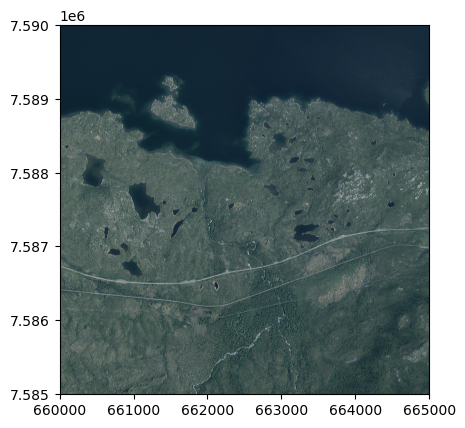

In [3]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
ax = show(img, extent=extent, ax=ax, cmap="pink")

In [6]:
img.bounds

BoundingBox(left=660000.0, bottom=7585000.0, right=665000.0, top=7590000.0)

In [12]:
print(str(img.bounds.bottom)[0:3])
print(str(img.bounds.left)[0:2])

758
66


In [15]:
km_siffran_x = 0 if int(str(img.bounds.left)[2]) < 5 else 5
km_siffran_x

0

In [16]:
def file_naming_logic(img):
    miny = str(img.bounds.bottom)[0:3]
    minx = str(img.bounds.left)[0:2]
    km_siffran_y = 0 if int(str(img.bounds.bottom)[3]) < 5 else 5
    km_siffran_x = 0 if int(str(img.bounds.left)[2]) < 5 else 5
    year = 2018

    filename = f"{miny}_{minx}_{km_siffran_y}{km_siffran_x}_{year}.tif"
    return filename

file_naming_logic(img)

'758_66_50_2018.tif'

In [29]:
import os
dir_files = os.listdir("/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/")
only_tifs = [filename for filename in dir_files if filename[-4:] == ".tif"]

<class 'list'>
<class 'str'>


In [32]:
print(only_tifs)

['758_66_55_2018.tif']


In [10]:
img2 = rasterio.open("/Users/nadja/Documents/UU/Thesis/generated_tifs/758_66_55_2018_crop_8379.tif")

### Generating .tif column in all rutor

In [76]:
import geopandas as gpd
all_rutor = gpd.read_file("/Users/nadja/Documents/UU/Thesis/data/Vector/palsaShape/RUTNAT_100x100M_PALS_OR_PALSVATT_ALL.shp")

In [55]:
testie = all_rutor.geometry[10357].bounds[0]

In [58]:
all_rutor.geometry[10357].bounds

(737200.0, 7581100.0, 737300.0, 7581200.0)

In [57]:
str(testie)[:2]


'73'

In [77]:
def tif_from_ruta(ruta_geometry):
    minx_ruta = ruta_geometry.bounds[0]
    miny_ruta = ruta_geometry.bounds[1]

    miny = str(miny_ruta)[0:3]
    minx = str(minx_ruta)[0:2]
    km_siffran_y = 0 if int(str(miny_ruta)[3]) < 5 else 5
    km_siffran_x = 0 if int(str(minx_ruta)[2]) < 5 else 5
    year = 2018

    filename = f"{miny}_{minx}_{km_siffran_y}{km_siffran_x}_{year}.tif"
    return filename

In [78]:
def filter_rutor(all_rutor):
    all_rutor['in_tif'] = all_rutor['geometry'].map(tif_from_ruta)
    uniques = all_rutor.in_tif.unique()

    original_tif_dir = "/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/"
    dir_files = os.listdir(original_tif_dir)
    only_tifs = [filename for filename in dir_files if filename[-4:] == ".tif"]

    # check that all uniques are in only tifs
    if not (set(list(uniques)).issubset(set(only_tifs))):
        # logger.WARN(f"at least one tif name generated from all_rutor was not found in the directory: {original_tif_dir}")
        print(f"at least one tif name generated from all_rutor was not found in the directory: {original_tif_dir}")

    intersection = list(set(uniques) & set(only_tifs))

    return intersection



In [79]:
filtered_rutor = filter_rutor(all_rutor)

at least one tif name generated from all_rutor was not found in the directory: /Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/


In [80]:
len(filtered_rutor)

2

In [ ]:
import os

original_tif_dir = "/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/"
dir_files = os.listdir(original_tif_dir)
only_tifs = [filename for filename in dir_files if filename[-4:] == ".tif"]

# FROM ONLY_TIFS only want to keep the .tifs that were in the tif_from_ruta. 
# Design a test to make sure no tif_from_ruta is missing from tifs in the directory. 


In [19]:
img2.bounds

BoundingBox(left=666400.0, bottom=7588100.0, right=666500.0, top=7588200.0)

In [21]:
type(img_rutor.geometry)

geopandas.geoseries.GeoSeries

In [14]:
img_rutor.head(5)

,MASK,KARTERAD,PALS,PALS_VATT,PALS_HA,PALSVATTHA,Shape_area,Shape_len,geometry
8311,INOM,KLAR,8,0,0.08,0.00,10000.0,400.0,"POLYGON ((665500.000 7587000.000, 665400.000 7..."
8315,INOM,KLAR,36,1,0.36,0.01,10000.0,400.0,"POLYGON ((665500.000 7587100.000, 665400.000 7..."
8316,INOM,KLAR,9,1,0.09,0.01,10000.0,400.0,"POLYGON ((667500.000 7587100.000, 667400.000 7..."
8318,INOM,KLAR,0,3,0.00,0.03,10000.0,400.0,"POLYGON ((667300.000 7587200.000, 667200.000 7..."
8319,INOM,KLAR,6,0,0.06,0.00,10000.0,400.0,"POLYGON ((667400.000 7587200.000, 667300.000 7..."


In [25]:
img_rutor.geometry.head(1)

8311    POLYGON ((665500.000 7587000.000, 665400.000 7...
Name: geometry, dtype: geometry

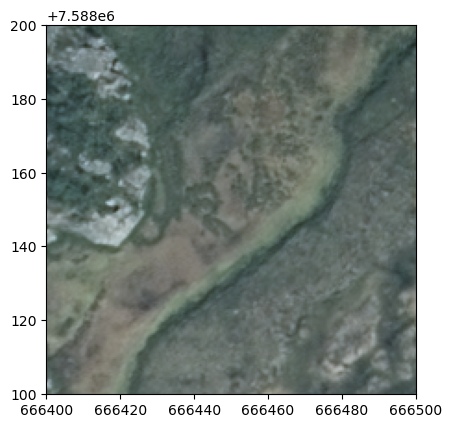

In [18]:
import matplotlib.pyplot as plt
from rasterio.plot import show


fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [img2.bounds[0], img2.bounds[2], img2.bounds[1], img2.bounds[3]]
ax = show(img2, extent=extent, ax=ax, cmap="pink")

In [7]:
img.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 10000,
 'height': 10000,
 'count': 3,
 'crs': CRS.from_epsg(3006),
 'transform': Affine(0.5, 0.0, 665000.0,
        0.0, -0.5, 7590000.0)}

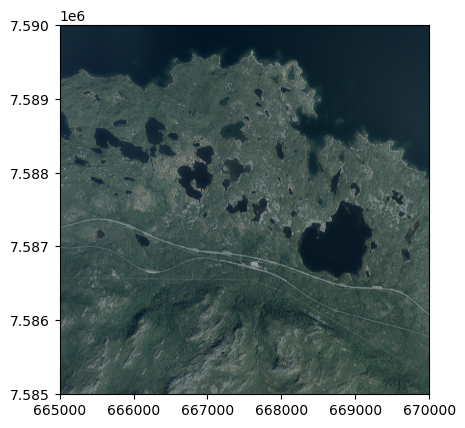

In [40]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
ax = show(img, extent=extent, ax=ax, cmap="pink")



In [ ]:
758_66_55

In [41]:
img.meta

ERROR 1: PROJ: internal_proj_identify: Cannot find proj.db


{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 10000,
 'height': 10000,
 'count': 3,
 'crs': CRS.from_wkt('LOCAL_CS["SWEREF99 TM",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(0.5, 0.0, 665000.0,
        0.0, -0.5, 7590000.0)}

<Axes: >

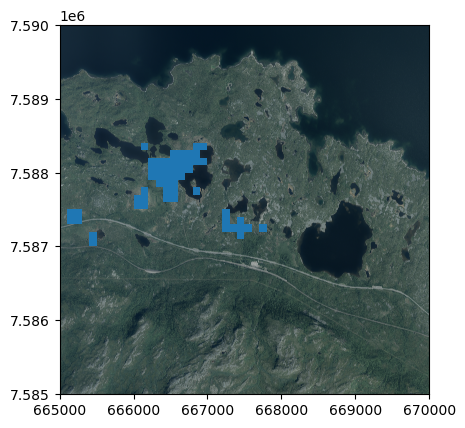

In [14]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
ax = show(img, extent=extent, ax=ax, cmap="pink")

img_rutor.plot(ax=ax)

In [31]:
type(img)

rasterio.io.DatasetReader

In [32]:
img.bounds

BoundingBox(left=665000.0, bottom=7585000.0, right=670000.0, top=7590000.0)

In [ ]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import os

# Load the TIF file
tif_data = img.read()
tif_meta = img.meta

# Load the GeoDataFrame with polygons
polygons_gdf = gpd.read_file("path/to/your/polygons.shp")


# Iterate over each polygon in the GeoDataFrame
for idx, polygon in enumerate(polygons_gdf.geometry):
    # Crop the TIF file using the polygon
    cropped_data, cropped_transform = mask(img, [polygon], crop=True)

    # Update the metadata for the cropped TIF
    cropped_meta = tif_meta.copy()
    cropped_meta.update({"driver": "GTiff",
                         "height": cropped_data.shape[1],
                         "width": cropped_data.shape[2],
                         "transform": cropped_transform})

    # Save the cropped TIF file with a unique name
    output_path = os.path.join(self.destination_path, f"cropped_{idx}.tif")
    with rasterio.open(output_path, "w", **cropped_meta) as dest:
        dest.write(cropped_data)

In [33]:
from rasterio.mask import mask

tif_data = img.read()
tif_meta = img.meta

# Select the specific polygon you want to use for cropping
polygon = img_rutor.geometry[8311]  # Assuming you want to use the first polygon

# Crop the TIF file using the polygon
cropped_data, cropped_transform = mask(img, [polygon], crop=True)

# Update the metadata for the cropped TIF
cropped_meta = tif_meta.copy()
cropped_meta.update({"driver": "GTiff",
                     "height": cropped_data.shape[1],
                     "width": cropped_data.shape[2],
                     "transform": cropped_transform})

# Save the cropped TIF file
with rasterio.open("/Users/nadja/Documents/UU/Thesis/generated_tifs/cropped.tif", "w", **cropped_meta) as dest:
    dest.write(cropped_data)


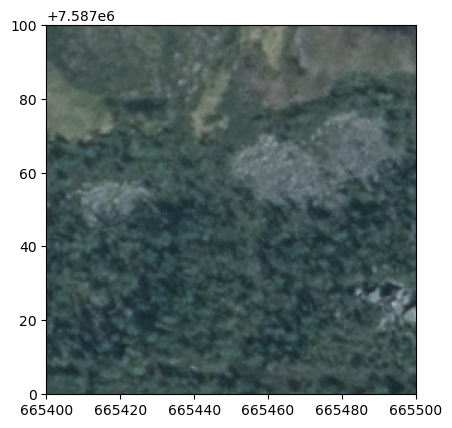

In [34]:
import matplotlib.pyplot as plt 
from rasterio.plot import show

cropped_img = rasterio.open("/Users/nadja/Documents/UU/Thesis/generated_tifs/cropped_0.tif")
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [cropped_img.bounds[0], cropped_img.bounds[2], cropped_img.bounds[1], cropped_img.bounds[3]]
ax = show(cropped_img, extent=extent, ax=ax, cmap="pink")

In [42]:
cropped_img.meta

ERROR 1: PROJ: internal_proj_identify: Cannot find proj.db


{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 200,
 'height': 200,
 'count': 3,
 'crs': CRS.from_wkt('LOCAL_CS["SWEREF99 TM",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(0.5, 0.0, 665400.0,
        0.0, -0.5, 7587100.0)}

In [74]:
import rasterio
from shapely.geometry import box, Polygon
import geopandas as gpd

# Open the raster file
with rasterio.open("/Users/nadja/Documents/UU/Thesis/data/Raster/OrthoRGB/758_66_55_2018.tif") as src:
    # Get the raster's bounds and CRS
    bounds = src.bounds
    crs = src.crs

# height and width of new squares 
square_dims = 100 # 100x100 meters

# Calculate the number of segments in each dimension (tif width // desired width in pixels!)
segments_x = 5000 // square_dims
segments_y = 5000 // square_dims

# Create an empty list to store the polygons
polygons = []

# Iterate over the segments
for i in range(segments_y):
    for j in range(segments_x):
        # Calculate the coordinates of the segment
        left = bounds.left + j * square_dims
        bottom = bounds.bottom + i * square_dims
        right = left + square_dims
        top = bottom + square_dims

        # Create a polygon for the segment
        polygon = Polygon([(right, bottom), (left, bottom), (left, top), (right, top), (right, bottom)])

        # Append the polygon to the list
        polygons.append(polygon)

# Create a GeoSeries from the list of polygons
all_rutor = gpd.GeoSeries(polygons, crs=crs)
all_rutor


0       POLYGON ((665100.000 7585000.000, 665000.000 7585000.000, 665000.000 7585100.000, 665100.000 7585100.000, 665100.000 7585000.000))
1       POLYGON ((665200.000 7585000.000, 665100.000 7585000.000, 665100.000 7585100.000, 665200.000 7585100.000, 665200.000 7585000.000))
2       POLYGON ((665300.000 7585000.000, 665200.000 7585000.000, 665200.000 7585100.000, 665300.000 7585100.000, 665300.000 7585000.000))
3       POLYGON ((665400.000 7585000.000, 665300.000 7585000.000, 665300.000 7585100.000, 665400.000 7585100.000, 665400.000 7585000.000))
4       POLYGON ((665500.000 7585000.000, 665400.000 7585000.000, 665400.000 7585100.000, 665500.000 7585100.000, 665500.000 7585000.000))
                                                                       ...                                                                
2495    POLYGON ((669600.000 7589900.000, 669500.000 7589900.000, 669500.000 7590000.000, 669600.000 7590000.000, 669600.000 7589900.000))
2496    POLYGON ((669700.00

In [75]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Print the polygon geometry
print(all_rutor.geometry[0])
print(img_rutor.geometry[8311])

POLYGON ((665100 7585000, 665000 7585000, 665000 7585100, 665100 7585100, 665100 7585000))
POLYGON ((665500 7587000, 665400 7587000, 665400 7587100, 665500 7587100, 665500 7587000))


In [76]:
# filter out the squares that are in positive samples
mask = ~all_rutor.isin(img_rutor.geometry)
negatives = all_rutor[mask]

In [46]:
mask[mask == False]

Series([], dtype: bool)

In [84]:
negatives.sample(n=5)

1659    POLYGON ((666000.000 7588300.000, 665900.000 7588300.000, 665900.000 7588400.000, 666000.000 7588400.000, 666000.000 7588300.000))
1749    POLYGON ((670000.000 7588400.000, 669900.000 7588400.000, 669900.000 7588500.000, 670000.000 7588500.000, 670000.000 7588400.000))
213     POLYGON ((666400.000 7585400.000, 666300.000 7585400.000, 666300.000 7585500.000, 666400.000 7585500.000, 666400.000 7585400.000))
1322    POLYGON ((667300.000 7587600.000, 667200.000 7587600.000, 667200.000 7587700.000, 667300.000 7587700.000, 667300.000 7587600.000))
1779    POLYGON ((668000.000 7588500.000, 667900.000 7588500.000, 667900.000 7588600.000, 668000.000 7588600.000, 668000.000 7588500.000))
dtype: geometry

In [50]:
img_rutor.geometry[8311].bounds

(665400.0, 7587000.0, 665500.0, 7587100.0)

In [89]:
negatives.geometry

0       POLYGON ((665100.000 7585000.000, 665000.000 7585000.000, 665000.000 7585100.000, 665100.000 7585100.000, 665100.000 7585000.000))
1       POLYGON ((665200.000 7585000.000, 665100.000 7585000.000, 665100.000 7585100.000, 665200.000 7585100.000, 665200.000 7585000.000))
2       POLYGON ((665300.000 7585000.000, 665200.000 7585000.000, 665200.000 7585100.000, 665300.000 7585100.000, 665300.000 7585000.000))
3       POLYGON ((665400.000 7585000.000, 665300.000 7585000.000, 665300.000 7585100.000, 665400.000 7585100.000, 665400.000 7585000.000))
4       POLYGON ((665500.000 7585000.000, 665400.000 7585000.000, 665400.000 7585100.000, 665500.000 7585100.000, 665500.000 7585000.000))
                                                                       ...                                                                
2495    POLYGON ((669600.000 7589900.000, 669500.000 7589900.000, 669500.000 7590000.000, 669600.000 7590000.000, 669600.000 7589900.000))
2496    POLYGON ((669700.00

In [86]:
type(img_rutor.geometry)

geopandas.geoseries.GeoSeries

In [87]:
for idx, poly in enumerate(negatives):
    print(idx,poly)

0 POLYGON ((665100 7585000, 665000 7585000, 665000 7585100, 665100 7585100, 665100 7585000))
1 POLYGON ((665200 7585000, 665100 7585000, 665100 7585100, 665200 7585100, 665200 7585000))
2 POLYGON ((665300 7585000, 665200 7585000, 665200 7585100, 665300 7585100, 665300 7585000))
3 POLYGON ((665400 7585000, 665300 7585000, 665300 7585100, 665400 7585100, 665400 7585000))
4 POLYGON ((665500 7585000, 665400 7585000, 665400 7585100, 665500 7585100, 665500 7585000))
5 POLYGON ((665600 7585000, 665500 7585000, 665500 7585100, 665600 7585100, 665600 7585000))
6 POLYGON ((665700 7585000, 665600 7585000, 665600 7585100, 665700 7585100, 665700 7585000))
7 POLYGON ((665800 7585000, 665700 7585000, 665700 7585100, 665800 7585100, 665800 7585000))
8 POLYGON ((665900 7585000, 665800 7585000, 665800 7585100, 665900 7585100, 665900 7585000))
9 POLYGON ((666000 7585000, 665900 7585000, 665900 7585100, 666000 7585100, 666000 7585000))
10 POLYGON ((666100 7585000, 666000 7585000, 666000 7585100, 666100 75

In [16]:
import numpy as np

dicc = {'file1': 1,
        'file2': 2,
        '2': 3}

dicc2 = {'a': 1,
        'fileb': 2,
        'c': 3}


In [17]:
dic3 = dicc | dicc2

In [18]:
dic3

{'file1': 1, 'file2': 2, '2': 3, 'a': 1, 'fileb': 2, 'c': 3}

In [19]:
dic4 = {}
dic4 = dic4 | dic3

In [20]:
dic4

{'file1': 1, 'file2': 2, '2': 3, 'a': 1, 'fileb': 2, 'c': 3}

In [21]:
from_dic = np.array(dicc)

In [22]:
from_dic

array({'file1': 1, 'file2': 2, '2': 3}, dtype=object)

In [27]:
import pandas as pd

dic_df = pd.DataFrame.from_dict(dic4, orient='index', columns = ['palsa_percentage'])
dic_df

,palsa_percentage
file1,1
file2,2
2,3
a,1
fileb,2
c,3


In [14]:
dic_df.to_csv("regularsettings.csv")